<a href="https://colab.research.google.com/github/mbrandino/Challenge_desafio3-ci-ncia-de-dados-/blob/main/Telecomx_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Megalonnix/ChallengeTelecomX/blob/master/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📌 **(ETL fase 01) - Extração Dados:**

In [68]:
import pandas as pd

In [69]:
dados = pd.read_csv('/content/Telecom_X_normalizado.csv', sep = ';')

In [70]:
dados.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
1,3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
2,4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20


In [71]:
dados_sem_index = dados.reset_index(drop=True)

In [72]:
dados_sem_index

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
1,3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
2,4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
3,7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
4,6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,6051-PTVNS,No,Female,0,Yes,Yes,55,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),"19,15","998,1"
7263,5899-MQZZL,Yes,Female,0,No,No,13,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,75,"999,45"
7264,6037-WPJRP,NaN,Female,0,No,No,13,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,75,"999,45"
7265,4536-PLEQY,No,Male,0,Yes,No,12,Yes,No,Fiber optic,...,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),"85,05","999,8"


### 🔧 **(ETL fase 02) - Análise do Dataframe original + normalização:**

O dataframe provém de um <strong>arquivo.json</strong>, por isso a seguir, farei uso do método normalize de maneira
a deixar o documento mais adequado para manipulação.

In [73]:
print(dados_sem_index)

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     1423-BMPBQ    No  Female              0     Yes        Yes       1   
1     3807-XHCJH    No  Female              0     Yes        Yes       1   
2     4877-EVATK   Yes    Male              0      No         No       1   
3     7698-YFGEZ    No    Male              0      No         No       1   
4     6770-XUAGN   Yes  Female              0     Yes        Yes       1   
...          ...   ...     ...            ...     ...        ...     ...   
7262  6051-PTVNS    No  Female              0     Yes        Yes      55   
7263  5899-MQZZL   Yes  Female              0      No         No      13   
7264  6037-WPJRP   NaN  Female              0      No         No      13   
7265  4536-PLEQY    No    Male              0     Yes         No      12   
7266  9093-FPDLG    No  Female              0      No         No      11   

     PhoneService MultipleLines InternetService  ...         OnlineBackup  \
0         

In [10]:
dados_sem_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7043 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [74]:
dados_sem_index.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [75]:
colunas_dados = list(dados_sem_index.columns)
colunas_dados

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges_Monthly',
 'Charges_Total']

In [76]:
dados_sem_index.set_index('customerID', inplace=True)

In [77]:
dados_sem_index.head(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20


In [15]:
# Analizando novas colunas existentes:
dados_sem_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 1423-BMPBQ to 9093-FPDLG
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Churn             7043 non-null   object
 1   gender            7267 non-null   object
 2   SeniorCitizen     7267 non-null   int64 
 3   Partner           7267 non-null   object
 4   Dependents        7267 non-null   object
 5   tenure            7267 non-null   int64 
 6   PhoneService      7267 non-null   object
 7   MultipleLines     7267 non-null   object
 8   InternetService   7267 non-null   object
 9   OnlineSecurity    7267 non-null   object
 10  OnlineBackup      7267 non-null   object
 11  DeviceProtection  7267 non-null   object
 12  TechSupport       7267 non-null   object
 13  StreamingTV       7267 non-null   object
 14  StreamingMovies   7267 non-null   object
 15  Contract          7267 non-null   object
 16  PaperlessBilling  7267 non-null   object
 17  Paym

In [78]:
dados_sem_index.dtypes

,0
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [79]:
colunas_dados = list(dados_sem_index.columns)
colunas_dados

['Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges_Monthly',
 'Charges_Total']

### 🔧 **(ETL fase 03) - Verificando Inconsistências nos Dados:**

In [80]:
def getValoresCelulas(dados_sem_index, nmColOrigem):
    vlsExistentes = {
        'nm_coluna': nmColOrigem,
        'valores_vistos': \
        list(pd.unique(dados_sem_index[nmColOrigem]))
    }
    return vlsExistentes

In [81]:
dados_sem_index.dropna(subset=['Churn'])

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249-THVEC,No,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,"19,4","997,75"
6051-PTVNS,No,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),"19,15","998,1"
5899-MQZZL,Yes,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75,"999,45"


In [82]:
getValoresCelulas(dados_sem_index, 'Churn') # Valores preenchidos na coluna "Evasão/Churn".

{'nm_coluna': 'Churn', 'valores_vistos': ['No', 'Yes', nan]}

In [84]:
dados_ok = dados_sem_index.dropna(subset=['Churn'], axis=0)

In [85]:
print(dados_ok['Churn'].isna())

customerID
1423-BMPBQ    False
3807-XHCJH    False
4877-EVATK    False
7698-YFGEZ    False
6770-XUAGN    False
              ...  
8249-THVEC    False
6051-PTVNS    False
5899-MQZZL    False
4536-PLEQY    False
9093-FPDLG    False
Name: Churn, Length: 7043, dtype: bool


In [86]:
dados_ok

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249-THVEC,No,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,"19,4","997,75"
6051-PTVNS,No,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),"19,15","998,1"
5899-MQZZL,Yes,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75,"999,45"


In [87]:
for nmColuna in dados_ok.columns:
    print(getValoresCelulas(dados_ok, nmColuna))

{'nm_coluna': 'Churn', 'valores_vistos': ['No', 'Yes']}
{'nm_coluna': 'gender', 'valores_vistos': ['Female', 'Male']}
{'nm_coluna': 'SeniorCitizen', 'valores_vistos': [np.int64(0), np.int64(1)]}
{'nm_coluna': 'Partner', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'Dependents', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'tenure', 'valores_vistos': [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(8), np.int64(7), np.int64(6), np.int64(11), np.int64(12), np.int64(10), np.int64(13), np.int64(14), np.int64(17), np.int64(18), np.int64(9), np.int64(21), np.int64(20), np.int64(22), np.int64(23), np.int64(27), np.int64(28), np.int64(24), np.int64(15), np.int64(35), np.int64(34), np.int64(36), np.int64(29), np.int64(39), np.int64(16), np.int64(25), np.int64(41), np.int64(46), np.int64(48), np.int64(44), np.int64(47), np.int64(53), np.int64(50), np.int64(55), np.int64(60), np.int64(26), np.int64(61), np.int64(59), np.int64(51), np.int64(33), np.int64(37), np.int64

In [89]:
dados_ok['Charges_Monthly'].isna()

,Charges_Monthly
customerID,
1423-BMPBQ,False
3807-XHCJH,False
4877-EVATK,False
7698-YFGEZ,False
6770-XUAGN,False
...,...
8249-THVEC,False
6051-PTVNS,False
5899-MQZZL,False


In [90]:
dados_ok.columns.str.lower()

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total'],
      dtype='object')

In [92]:
dados_ok.columns.str.lower().str.replace(' ','_')

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total'],
      dtype='object')

In [93]:
dados_ok.columns = dados_ok.columns.str.lower().str.replace(' ','_')

In [94]:
dados_ok.head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20


In [95]:
dados_ok.churn.unique()

array(['No', 'Yes'], dtype=object)

In [96]:
dados_ok['churn'].unique()

array(['No', 'Yes'], dtype=object)

### 🔧 **(ETL fase 04) - Tratando as Inconsistências nos Dados:**

Primeiro antes de criar a coluna "Contas Diárias" pedida no Challenge, excluirei alguns valores inválidos dentro do dataframe.
- Antes de converter valores aos tipos *np.float64*, *string*, *etc*; irei verificar valores inadequados, como strings vazias ou NaN.
- Feito isso, faço a conversão dos tipos.

In [97]:
dados_ok

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249-THVEC,No,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,"19,4","997,75"
6051-PTVNS,No,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),"19,15","998,1"
5899-MQZZL,Yes,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75,"999,45"


In [98]:
# Testes iniciais:

a = dados_ok['churn'].isin(['Yes']).sum()
b = dados_ok['churn'].isin(['No']).sum()
(a + b) == len(dados_ok['churn'])

np.True_

In [99]:
a + b

np.int64(7043)

In [100]:
selecao_churn1 = dados_ok['churn'] == 'Yes'
selecao_churn2 = dados_ok['churn'] == 'No'
len(dados_ok[selecao_churn1]) + \
len(dados_ok[selecao_churn2])

7043

In [101]:
c = dados_ok['churn'].isin(['Yes','No']).sum()
c

np.int64(7043)

In [103]:
dados_ok

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249-THVEC,No,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,"19,4","997,75"
6051-PTVNS,No,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),"19,15","998,1"
5899-MQZZL,Yes,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75,"999,45"


In [104]:
c < len(dados_ok)

np.False_

In [105]:
dados_ok['churn'].value_counts(dropna=False)

,count
churn,
No,5174
Yes,1869


In [106]:
# Série booleana com indices do DF que estão adequados
# ao padrão "Yes"/"No":
dados_ok['churn'].isin(['Yes','No'])

,churn
customerID,
1423-BMPBQ,True
3807-XHCJH,True
4877-EVATK,True
7698-YFGEZ,True
6770-XUAGN,True
...,...
8249-THVEC,True
6051-PTVNS,True
5899-MQZZL,True


In [107]:
dados_ok

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249-THVEC,No,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,"19,4","997,75"
6051-PTVNS,No,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),"19,15","998,1"
5899-MQZZL,Yes,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75,"999,45"


In [108]:
# Indices os quais RESPEITAM o padrão acima:
dados_ok[dados_ok['churn'].isin(['Yes','No'])].head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20


In [115]:
# Indices os quais NÃO respeitam:
dados_ok[dados_ok['churn'].isin(['Yes','No'])].head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20


In [117]:
len(dados_ok[dados_ok['churn'].isin(['Yes','No'])]) # Número deles

7043

In [118]:
dados_ok = dados_ok[dados_ok['churn'].isin(['Yes','No'])] # Retirando todos os índices indesejados do Dataframe

In [119]:
dados_ok['churn'].value_counts()

,count
churn,
No,5174
Yes,1869


In [120]:
dados_ok['churn'] = dados_ok['churn'].astype(str)

In [46]:
dados_ok = dados_ok[dados_ok['charges_total'].isin(['',' '])] # Removendo valores vazios dos registros de cobrança.

In [121]:
dados_ok

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249-THVEC,No,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,"19,4","997,75"
6051-PTVNS,No,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),"19,15","998,1"
5899-MQZZL,Yes,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75,"999,45"


In [123]:
dados_ok.head()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21,21


In [124]:
dados_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 1423-BMPBQ to 9093-FPDLG
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   churn             7043 non-null   object
 1   gender            7043 non-null   object
 2   seniorcitizen     7043 non-null   int64 
 3   partner           7043 non-null   object
 4   dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   phoneservice      7043 non-null   object
 7   multiplelines     7043 non-null   object
 8   internetservice   7043 non-null   object
 9   onlinesecurity    7043 non-null   object
 10  onlinebackup      7043 non-null   object
 11  deviceprotection  7043 non-null   object
 12  techsupport       7043 non-null   object
 13  streamingtv       7043 non-null   object
 14  streamingmovies   7043 non-null   object
 15  contract          7043 non-null   object
 16  paperlessbilling  7043 non-null   object
 17  paym

In [125]:
print(dados_ok)

           churn  gender  seniorcitizen partner dependents  tenure  \
customerID                                                           
1423-BMPBQ    No  Female              0     Yes        Yes       1   
3807-XHCJH    No  Female              0     Yes        Yes       1   
4877-EVATK   Yes    Male              0      No         No       1   
7698-YFGEZ    No    Male              0      No         No       1   
6770-XUAGN   Yes  Female              0     Yes        Yes       1   
...          ...     ...            ...     ...        ...     ...   
8249-THVEC    No    Male              0     Yes        Yes      51   
6051-PTVNS    No  Female              0     Yes        Yes      55   
5899-MQZZL   Yes  Female              0      No         No      13   
4536-PLEQY    No    Male              0     Yes         No      12   
9093-FPDLG    No  Female              0      No         No      11   

           phoneservice multiplelines internetservice       onlinesecurity  \
customerID 

In [126]:
dados_ok['charges_total'].head(3)

,charges_total
customerID,
1423-BMPBQ,19
3807-XHCJH,20
4877-EVATK,20


In [127]:
dados_ok

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20,20
6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249-THVEC,No,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,"19,4","997,75"
6051-PTVNS,No,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),"19,15","998,1"
5899-MQZZL,Yes,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75,"999,45"


In [146]:
dados_ok

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.00,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,20
7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,20
6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249-THVEC,No,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,"997,75"
6051-PTVNS,No,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,"998,1"
5899-MQZZL,Yes,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,"999,45"


In [147]:
dados_ok['charges_monthly'] = dados_ok['charges_monthly'].astype(float)
print(dados_ok.dtypes)

churn                object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
charges_monthly     float64
charges_total        object
dtype: object


In [137]:
dados_ok

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.00,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,20
7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,20
6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249-THVEC,No,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,"997,75"
6051-PTVNS,No,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,"998,1"
5899-MQZZL,Yes,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,"999,45"


In [149]:
dados_ok['charges_total'] = dados_ok['charges_total'].str.replace(',', '.')

In [155]:
dados_ok['charges_total'] = dados_ok['charges_total'].astype(float)
print(dados_ok.dtypes)

churn                object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
charges_monthly     float64
charges_total       float64
dtype: object


In [152]:
dados_ok

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19
3807-XHCJH,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.00,20
4877-EVATK,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,20
7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,20
6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249-THVEC,No,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75
6051-PTVNS,No,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1
5899-MQZZL,Yes,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,999.45


In [156]:
dados_ok.charges_total.sum()

np.float64(16056168.7)

In [157]:
dados_ok.charges_monthly.sum()

np.float64(456116.6)

In [158]:
dados_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 1423-BMPBQ to 9093-FPDLG
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null 

In [159]:
contas_diarias_calc = (dados_ok['charges_monthly']/30)
contas_diarias_calc

,charges_monthly
customerID,
1423-BMPBQ,0.633333
3807-XHCJH,0.666667
4877-EVATK,0.666667
7698-YFGEZ,0.666667
6770-XUAGN,0.700000
...,...
8249-THVEC,0.646667
6051-PTVNS,0.638333
5899-MQZZL,2.500000


In [160]:
dados_ok['contas_diarias'] = contas_diarias_calc
dados_ok.loc[:,'contas_diarias'] = dados_ok['contas_diarias'].astype(np.float64)

In [161]:
dados_ok.columns

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total', 'contas_diarias'],
      dtype='object')

In [162]:
dados_ok.head(1)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.0,19.0,0.633333


### 🔧 **(ETL fase 04B) - Padronização e Transformação de Dados (Opcional):**

In [163]:
for nmColuna in dados_ok.columns:
    print(getValoresCelulas(dados_ok, nmColuna))

{'nm_coluna': 'churn', 'valores_vistos': ['No', 'Yes']}
{'nm_coluna': 'gender', 'valores_vistos': ['Female', 'Male']}
{'nm_coluna': 'seniorcitizen', 'valores_vistos': [np.int64(0), np.int64(1)]}
{'nm_coluna': 'partner', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'dependents', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'tenure', 'valores_vistos': [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(8), np.int64(7), np.int64(6), np.int64(11), np.int64(12), np.int64(10), np.int64(13), np.int64(14), np.int64(17), np.int64(18), np.int64(9), np.int64(21), np.int64(20), np.int64(22), np.int64(23), np.int64(27), np.int64(28), np.int64(24), np.int64(15), np.int64(35), np.int64(34), np.int64(36), np.int64(29), np.int64(39), np.int64(16), np.int64(25), np.int64(41), np.int64(46), np.int64(48), np.int64(44), np.int64(47), np.int64(53), np.int64(50), np.int64(55), np.int64(60), np.int64(26), np.int64(61), np.int64(59), np.int64(51), np.int64(33), np.int64(37), np.int64

In [164]:
df_info_binarias = dados_ok.copy(deep=True)

In [166]:
# ----------------------------------------------------------------------
# AVISO: Não vou refatorar com funções para decorar melhor o comando:
# ----------------------------------------------------------------------
import numpy as np

copia1 = dados_ok['churn'].map({'Yes': 1,'No': 0}).astype(np.int64)
df_info_binarias.drop(columns='churn')
df_info_binarias['churn'] = copia1

copia2 = dados_ok['partner'].map({'Yes': 1,'No': 0}).astype(np.int64)
df_info_binarias.drop(columns='partner')
df_info_binarias['partner'] = copia2

copia3 = dados_ok['dependents'].map({'Yes': 1,'No': 0}).astype(np.int64)
df_info_binarias.drop(columns='dependents')
df_info_binarias['dependents'] = copia3

# ----------------------------------------------------------------------
# AVISO 02: Essa segunda leva vou refatorar:
# ----------------------------------------------------------------------

def remodelarColuna(nmColuna, dicionario):
    copia = dados_ok[nmColuna].map(dicionario).astype(np.int64)
    df_info_binarias.drop(columns=nmColuna)
    df_info_binarias[nmColuna] = copia

dict_opcoes = {
    'Yes': 1,
    'DSL': 1,
    'Fiber optic': 1,
    'No': 0,
    'No phone service': 0,
    'No internet service': 0
}

remodelarColuna('phoneservice', dict_opcoes)
remodelarColuna('multiplelines', dict_opcoes)
remodelarColuna('internetservice', dict_opcoes)
remodelarColuna('onlinesecurity', dict_opcoes)
remodelarColuna('onlinebackup', dict_opcoes)
remodelarColuna('deviceprotection', dict_opcoes)
remodelarColuna('techsupport', dict_opcoes)
remodelarColuna('streamingtv', dict_opcoes)
remodelarColuna('streamingmovies', dict_opcoes)
remodelarColuna('paperlessbilling', dict_opcoes)

In [167]:
df_info_binarias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 1423-BMPBQ to 9093-FPDLG
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   int64  
 4   dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   int64  
 7   multiplelines     7043 non-null   int64  
 8   internetservice   7043 non-null   int64  
 9   onlinesecurity    7043 non-null   int64  
 10  onlinebackup      7043 non-null   int64  
 11  deviceprotection  7043 non-null   int64  
 12  techsupport       7043 non-null   int64  
 13  streamingtv       7043 non-null   int64  
 14  streamingmovies   7043 non-null   int64  
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null 

In [168]:
df_info_binarias.head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,0,Female,0,1,1,1,1,0,0,0,...,0,0,0,0,Month-to-month,1,Mailed check,19.0,19.0,0.633333
3807-XHCJH,0,Female,0,1,1,1,1,0,0,0,...,0,0,0,0,Month-to-month,0,Electronic check,20.0,20.0,0.666667
4877-EVATK,1,Male,0,0,0,1,1,0,0,0,...,0,0,0,0,Month-to-month,0,Mailed check,20.0,20.0,0.666667


### **📊 (ETL fase 05) - Carga e Análise (L - Load & Analysis)**

In [170]:
dados_ok.describe()

,seniorcitizen,tenure,charges_monthly,charges_total,contas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158723
std,0.368612,24.559481,30.090047,2266.794470,1.003002
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.500000,398.550000,1.183333
50%,0.000000,29.000000,70.350000,1394.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [171]:
df_info_binarias.describe()

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total,contas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.783331,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [172]:
dados_ok[['charges_monthly','charges_total','contas_diarias']].describe()

,charges_monthly,charges_total,contas_diarias
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,2.158723
std,30.090047,2266.794470,1.003002
min,18.250000,0.000000,0.608333
25%,35.500000,398.550000,1.183333
50%,70.350000,1394.550000,2.345000
75%,89.850000,3786.600000,2.995000
max,118.750000,8684.800000,3.958333


In [173]:
df_info_binarias[['charges_monthly','charges_total','contas_diarias']].describe()

,charges_monthly,charges_total,contas_diarias
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,2.158723
std,30.090047,2266.794470,1.003002
min,18.250000,0.000000,0.608333
25%,35.500000,398.550000,1.183333
50%,70.350000,1394.550000,2.345000
75%,89.850000,3786.600000,2.995000
max,118.750000,8684.800000,3.958333


In [174]:
dados_ok.columns

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total', 'contas_diarias'],
      dtype='object')

In [ ]:
# dados_ok[['']] # ... pegar o desvio padrão de month to manth, two years, one year

In [175]:
dados_ok.query('contract=="Month-to-month"').head(1)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
1423-BMPBQ,No,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.0,19.0,0.633333


In [180]:
import pandas as pd

contratos_pagamento_mensal = dados_ok.query('contract == "Month-to-month"')['charges_monthly'].describe()
print(contratos_pagamento_mensal)  # ou pd.DataFrame(contratos_pagamento_mensal)


count    3875.000000
mean       66.398490
std        26.926599
min        18.750000
25%        45.850000
50%        73.250000
75%        88.875000
max       117.450000
Name: charges_monthly, dtype: float64


In [181]:
mediana = contratos_pagamento_mensal.median(numeric_only=True)
round(mediana,3)

69.824

In [182]:
contratos_pagamento_bienal =\
dados_ok.query('contract=="Two year"')['charges_monthly'].describe()
contratos_pagamento_bienal

,charges_monthly
count,1695.000000
mean,60.770413
std,34.678865
min,18.400000
25%,24.025000
50%,64.350000
75%,90.450000
max,118.750000


In [183]:
mediana = contratos_pagamento_bienal.median(numeric_only=True)
round(mediana,3)

62.56

In [184]:
contratos_pagamento_anual = \
dados_ok.query('contract=="One year"')['charges_monthly'].describe()
contratos_pagamento_anual

,charges_monthly
count,1473.000000
mean,65.048608
std,31.840539
min,18.250000
25%,26.900000
50%,68.750000
75%,94.800000
max,118.600000


In [185]:
mediana = contratos_pagamento_anual.median(numeric_only=True)
round(mediana,3)

66.899

### **📊 (ETL fase 06) - Distribuição da Evasão**

Neste passo, o objetivo é entender como a variável "**churn**" (*evasão*) está distribuída entre os clientes. Utilize gráficos para visualizar a proporção de clientes que permaneceram e os que saíram.

##### 💡**Ideia: Vou agrupar Evasões (Churns) por categorias:**

Quero tentar entender melhor os grupos os quais tem o maior número de evasões.
- Evasões por tipo de contrato.

In [186]:
df_info_binarias[['contract','churn']]

,contract,churn
customerID,,
1423-BMPBQ,Month-to-month,0
3807-XHCJH,Month-to-month,0
4877-EVATK,Month-to-month,1
7698-YFGEZ,Month-to-month,0
6770-XUAGN,Month-to-month,1
...,...,...
8249-THVEC,One year,0
6051-PTVNS,One year,0
5899-MQZZL,Month-to-month,1


In [187]:
evasoes_por_contrato = df_info_binarias\
    .groupby('contract')['churn']\
    .sum().sort_values()

In [189]:
import pandas as pd

df_evasoes = pd.DataFrame(evasoes_por_contrato)
df_evasoes


,churn
contract,
Two year,48
One year,166
Month-to-month,1655


In [190]:
# ------------------------------------------
# Porcentagem de clientes os quais evadiram:
# ------------------------------------------

import matplotlib.pyplot as plt

clintes_que_evadiram = dados_ok['churn'] == 'Yes'

porcentg_planos_cancelados = \
    len(dados_ok[clintes_que_evadiram])/len(dados_ok)

porcentg_planos_ativos = \
    1 - porcentg_planos_cancelados

In [ ]:
porcentg_planos_ativos

0.7342150170648465

In [191]:
porcentg_planos_cancelados

0.2653698707936959

In [193]:
def showPorcentagemGrupo(
    titulo,
    totalAmostra,
    qtdGrupo,
    legendasGraph):

    porcentagens = [totalAmostra, qtdGrupo]
    fig, ax = plt.subplots()
    ax.set_title(titulo, fontsize=15, loc='left')

    ax.pie(
        porcentagens,
        labels=legendasGraph,
        autopct='%1.1f%%')
    plt.show()

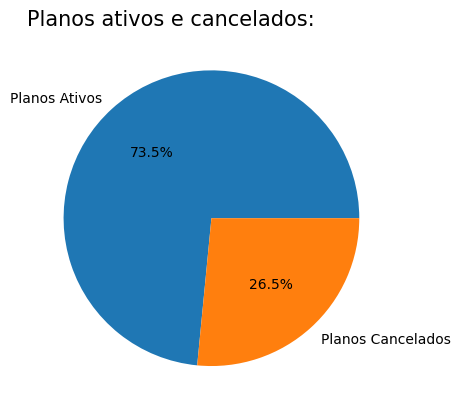

In [194]:
showPorcentagemGrupo(
    'Planos ativos e cancelados:',
    porcentg_planos_ativos,
    porcentg_planos_cancelados,
    ['Planos Ativos','Planos Cancelados'])

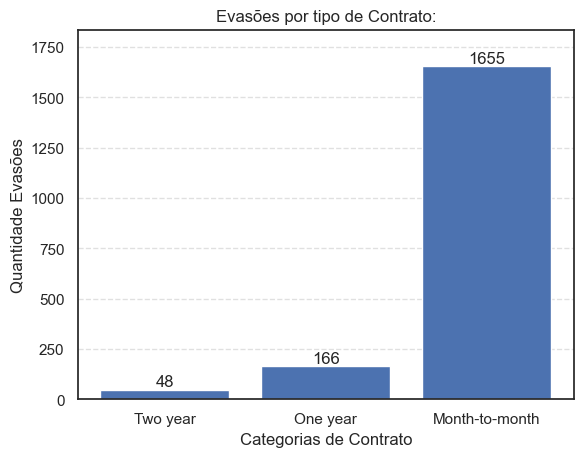

In [ ]:
# -------------------------------------------
# Quantidade de evasões por tipo de contrato:
# -------------------------------------------

import matplotlib.pyplot as plt

categorias_grafico = list(df_evasoes.index)
valores = [vl for vl in df_evasoes['churn']]

plt.bar(categorias_grafico, valores)

plt.title('Evasões por tipo de Contrato:')
plt.xlabel('Categorias de Contrato')
plt.ylabel('Quantidade Evasões')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, vlr in enumerate(valores):
    plt.text(
        i,
        vlr,
        f'{vlr}',
        ha='center',
        va='bottom')

plt.ylim(0, max(valores) * 1.11)
plt.show()

 ##### **Seguindo roteiro Challenge: Contagem de Evasão por Variáveis Categóricas:**

Agora, vamos explorar como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

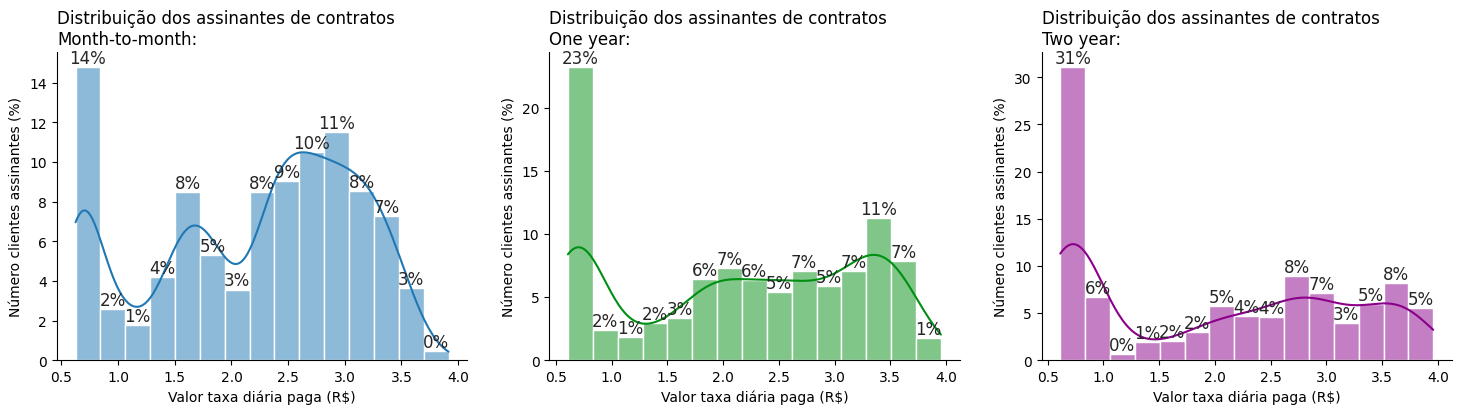

In [195]:
# OBJETIVO GRÁFICO:
# Avaliando a distribuição de taxas
# diárias pagas por clientes
# de diferentes tipos de contrato (Mensal,Anual,Bienal).

import seaborn as sns
import math

def obterDadosContratos(tipoContrato = str):
    clients_pagamento_periodo_x = dados_ok['contract'] == tipoContrato
    valores_pagos = dados_ok[clients_pagamento_periodo_x]['contas_diarias']
    return valores_pagos

valores_pagos = obterDadosContratos('Month-to-month')
valores_pagos2 = obterDadosContratos('One year')
valores_pagos3 = obterDadosContratos('Two year')

# Construção do Histograma:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
sns.set_theme(style='white')

NUM_CLASSES = 15

def assembleHistogram(
        data,kde,ax,bins,element,stat,color):
    return sns.histplot(
        data=data,
        kde=kde,
        ax=ax,
        bins=bins,
        element=element,
        stat=stat,
        color=color)

hist_plot = assembleHistogram(
    valores_pagos, True, ax1, NUM_CLASSES, 'bars', 'percent', "tab:blue")
hist_plot2 = assembleHistogram(
    valores_pagos2, True, ax2, NUM_CLASSES, 'bars', 'percent', "#008F13")
hist_plot3 = assembleHistogram(
    valores_pagos3, True, ax3, NUM_CLASSES, 'bars', 'percent', "darkmagenta")

def roundLabel(numFloat):
    return math.floor(numFloat)

def addLabelOnBars(histograma, subplot):
    for vls_barras in histograma.containers:
        subplot.bar_label(
            vls_barras,
            labels=[
                f'{roundLabel(vl_individual.get_height())}%'
                for vl_individual in vls_barras ]
            )

addLabelOnBars(hist_plot, ax1)
addLabelOnBars(hist_plot2, ax2)
addLabelOnBars(hist_plot3, ax3)

def assembleSubplotLabel(subplot, tp_contrato):
    str_titulo = 'Distribuição dos assinantes de contratos\n'
    str_titulo += tp_contrato + ':'
    subplot.set_title(str_titulo, loc='left', fontsize=12)

    subplot.set_ylabel('Número clientes assinantes (%)') # Por default, ele pega da Series
    subplot.set_xlabel('Valor taxa diária paga (R$)')

assembleSubplotLabel(ax1,'Month-to-month')
assembleSubplotLabel(ax2,'One year')
assembleSubplotLabel(ax3,'Two year')

sns.despine()

In [ ]:
# IDEIA: posso fazer uma releitura do gráfico acima,
# porém separando em classes, os que evadiram apenas, e os que NÃO evadiram
# em outro histograma!

In [196]:
df_info_binarias.query('gender=="Male" & churn==1')[['contas_diarias','charges_monthly','charges_total']]

,contas_diarias,charges_monthly,charges_total
customerID,,,
4877-EVATK,0.666667,20.00,20.00
3583-EKAPL,1.833333,55.00,55.00
1853-UDXBW,2.333333,70.00,70.00
5583-SXDAG,2.333333,70.00,70.00
3422-LYEPQ,2.366667,71.00,71.00
...,...,...,...
2157-MXBJS,2.510000,75.30,989.45
0107-YHINA,3.325000,99.75,99.75
7384-GHBPI,1.171667,35.15,99.75


In [197]:
homens_evasores = \
df_info_binarias.query('gender=="Male" & churn==1')

homens_evasores[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,930.000000,930.000000,930.000000
mean,2.468900,74.066989,1623.491559
std,0.839178,25.175329,1995.121272
min,0.628333,18.850000,18.850000
25%,1.815000,54.450000,114.737500
50%,2.654167,79.625000,740.150000
75%,3.154583,94.637500,2448.550000
max,3.945000,118.350000,8684.800000


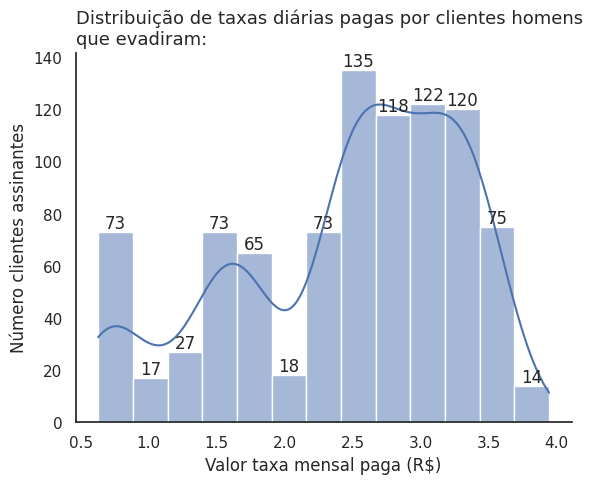

In [198]:
serie_contas_diarias_h_evasores = homens_evasores['contas_diarias']

hist_plot = sns.histplot(
    kde=True,
    data=serie_contas_diarias_h_evasores,
    stat='count',
    #color='darkmagenta'
    )

plt.title('Distribuição de taxas diárias pagas por clientes homens' +
          '\nque evadiram:', loc='left', fontsize=13)
plt.ylabel('Número clientes assinantes')
plt.xlabel('Valor taxa mensal paga (R$)')
sns.despine()

for vl_barra in hist_plot.containers:
    hist_plot.bar_label(vl_barra)

In [199]:
homens_nao_evasores = \
df_info_binarias.query('gender=="Male" & churn==0')

homens_nao_evasores[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,2625.000000,2625.000000,2625.000000
mean,2.029230,60.876914,2511.987562
std,1.031994,30.959834,2306.766988
min,0.608333,18.250000,0.000000
25%,0.833333,25.000000,559.200000
50%,2.146667,64.400000,1651.950000
75%,2.918333,87.550000,4189.700000
max,3.940000,118.200000,8594.400000


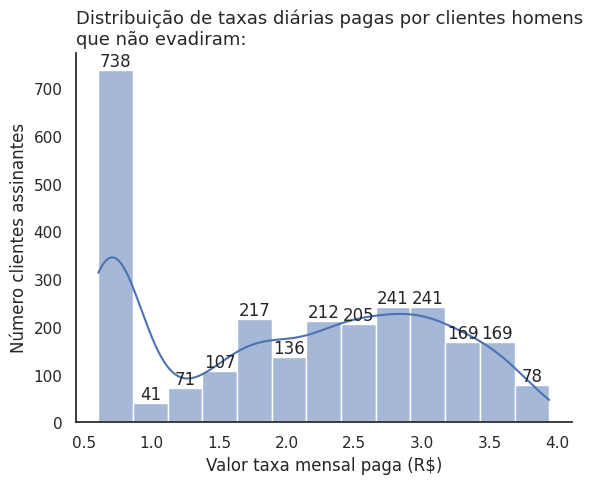

In [200]:
serie_contas_diarias_h_n_evasores = homens_nao_evasores['contas_diarias']

hist_plot = sns.histplot(
    kde=True,
    data=serie_contas_diarias_h_n_evasores,
    stat='count')

plt.title('Distribuição de taxas diárias pagas por clientes homens' +
          '\nque não evadiram:', loc='left', fontsize=13)
plt.ylabel('Número clientes assinantes')
plt.xlabel('Valor taxa mensal paga (R$)')
sns.despine()

for vl_barra in hist_plot.containers:
    hist_plot.bar_label(vl_barra)

In [201]:
mulheres_evasoras = \
df_info_binarias.query('gender=="Female" & churn==1')

mulheres_evasoras[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,939.000000,939.000000,939.000000
mean,2.493736,74.812087,1440.979499
std,0.805293,24.158783,1777.926268
min,0.633333,19.000000,19.100000
25%,2.104167,63.125000,143.750000
50%,2.655000,79.650000,663.050000
75%,3.125000,93.750000,2222.125000
max,3.915000,117.450000,8127.600000


In [202]:
mulheres_n_evasoras = \
df_info_binarias.query('gender=="Female" & churn==0')

mulheres_n_evasoras[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,2549.000000,2549.000000,2549.000000
mean,2.055497,61.664908,2588.966046
std,1.040995,31.229862,2353.407995
min,0.613333,18.400000,0.000000
25%,0.840000,25.200000,592.650000
50%,2.150000,64.500000,1710.150000
75%,2.961667,88.850000,4299.950000
max,3.958333,118.750000,8672.450000


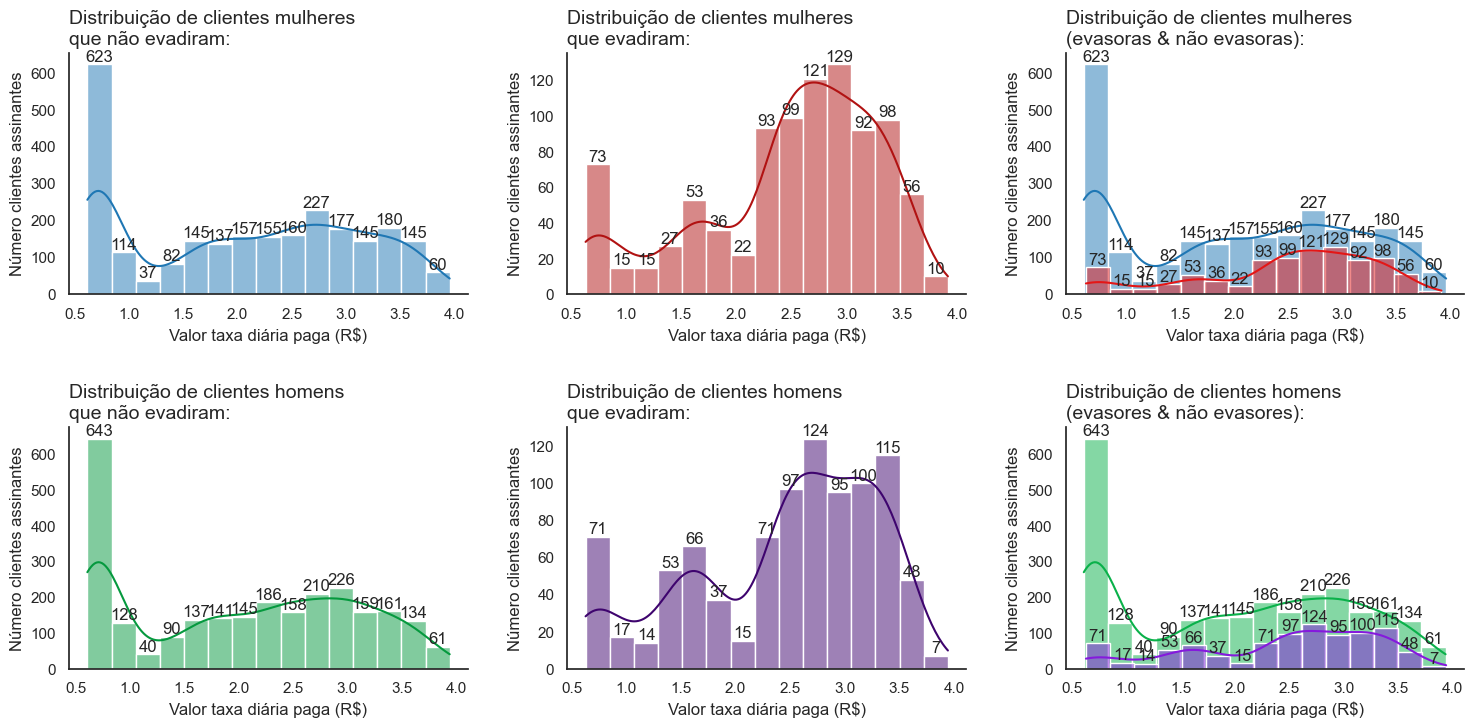

In [ ]:
serie_contas_diarias_m_evasoras = mulheres_evasoras['contas_diarias']
serie_contas_diarias_m_n_evasoras = mulheres_n_evasoras['contas_diarias']

fig,axs = plt.subplots(2,3, figsize=(18,8))
fig.subplots_adjust(hspace=0.55,wspace=0.25)
ax1, ax2, ax3 = axs[0]
ax4, ax5, ax6 = axs[1]

NUM_CLASSES = 15

histplot1 = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_n_evasoras,
    stat='count',
    color='tab:blue',
    ax=ax1,
    bins=NUM_CLASSES,
    element='bars'
)
histplot2 = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_evasoras,
    stat='count',
    color="#B11212",
    ax=ax2,
    bins=NUM_CLASSES,
    element='bars'
)
histplot3a = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_n_evasoras,
    stat='count',
    color='tab:blue',
    ax=ax3,
    bins=NUM_CLASSES,
    element='bars'
)
histplot3b = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_evasoras,
    stat='count',
    color="#E41616",
    ax=ax3,
    bins=NUM_CLASSES,
    element='bars'
)

histplot4 = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_h_n_evasores,
    stat='count',
    color="#05993E",
    ax=ax4,
    bins=NUM_CLASSES,
    element='bars'
)
histplot5 = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_h_evasores,
    stat='count',
    color="#3E046E",
    ax=ax5,
    bins=NUM_CLASSES,
    element='bars'
)
histplot6a = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_h_n_evasores,
    stat='count',
    color="#0AB14A",
    ax=ax6,
    bins=NUM_CLASSES,
    element='bars'
)
histplot6b = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_h_evasores,
    stat='count',
    color="#8519DD",
    ax=ax6,
    bins=NUM_CLASSES,
    element='bars'
)


def addLabel(nmHistplot):
    for vl_barra in nmHistplot.containers:
        nmHistplot.bar_label(vl_barra)

addLabel(histplot1)
addLabel(histplot2)
addLabel(histplot3a)
addLabel(histplot4)
addLabel(histplot5)
addLabel(histplot6a)

def assembleSubplotLabel2(subplot,
    titulo = str,
    labelEixoY = str,
    labelEixoX = str,
    fSize=int):

    str_titulo = titulo + ':'
    subplot.set_title(str_titulo, loc='left', fontsize=fSize)
    subplot.set_ylabel(labelEixoY)
    subplot.set_xlabel(labelEixoX)

assembleSubplotLabel2(ax1,
    'Distribuição de clientes mulheres \nque não evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

assembleSubplotLabel2(ax2,
    'Distribuição de clientes mulheres \nque evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

assembleSubplotLabel2(ax3,
    'Distribuição de clientes mulheres\n(evasoras & não evasoras)',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

assembleSubplotLabel2(ax4,
    'Distribuição de clientes homens \nque não evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

assembleSubplotLabel2(ax5,
    'Distribuição de clientes homens \nque evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

assembleSubplotLabel2(ax6,
    'Distribuição de clientes homens\n(evasores & não evasores)',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

sns.despine()

# plt.savefig("images/dist_evasoes_genero.jpg", dpi=300, bbox_inches='tight')

In [203]:
qtd_homens_evasores = len(homens_evasores)
qtd_homens_n_evasores = len(homens_nao_evasores)
qtd_mulheres_evasoras = len(mulheres_evasoras)
qtd_mulheres_n_evasoras = len(mulheres_n_evasoras)

In [204]:
total_homens = qtd_homens_evasores + qtd_homens_n_evasores
porc_evasores = qtd_homens_evasores/total_homens

In [205]:
total_mulheres = qtd_mulheres_evasoras + qtd_mulheres_n_evasoras
porc_evasoras = qtd_mulheres_evasoras/total_mulheres

In [206]:
def roundTxt(valor):
    return f'{round(valor * 100, 2)}%'

In [207]:
print('Homens evasores:',roundTxt(porc_evasores))
print('Homens não evasores:',roundTxt(1 - porc_evasores))
print('Mulheres evasoras:',roundTxt(porc_evasoras))
print('Mulheres não evasoras:',roundTxt(1 - porc_evasoras))

Homens evasores: 26.16%
Homens não evasores: 73.84%
Mulheres evasoras: 26.92%
Mulheres não evasoras: 73.08%


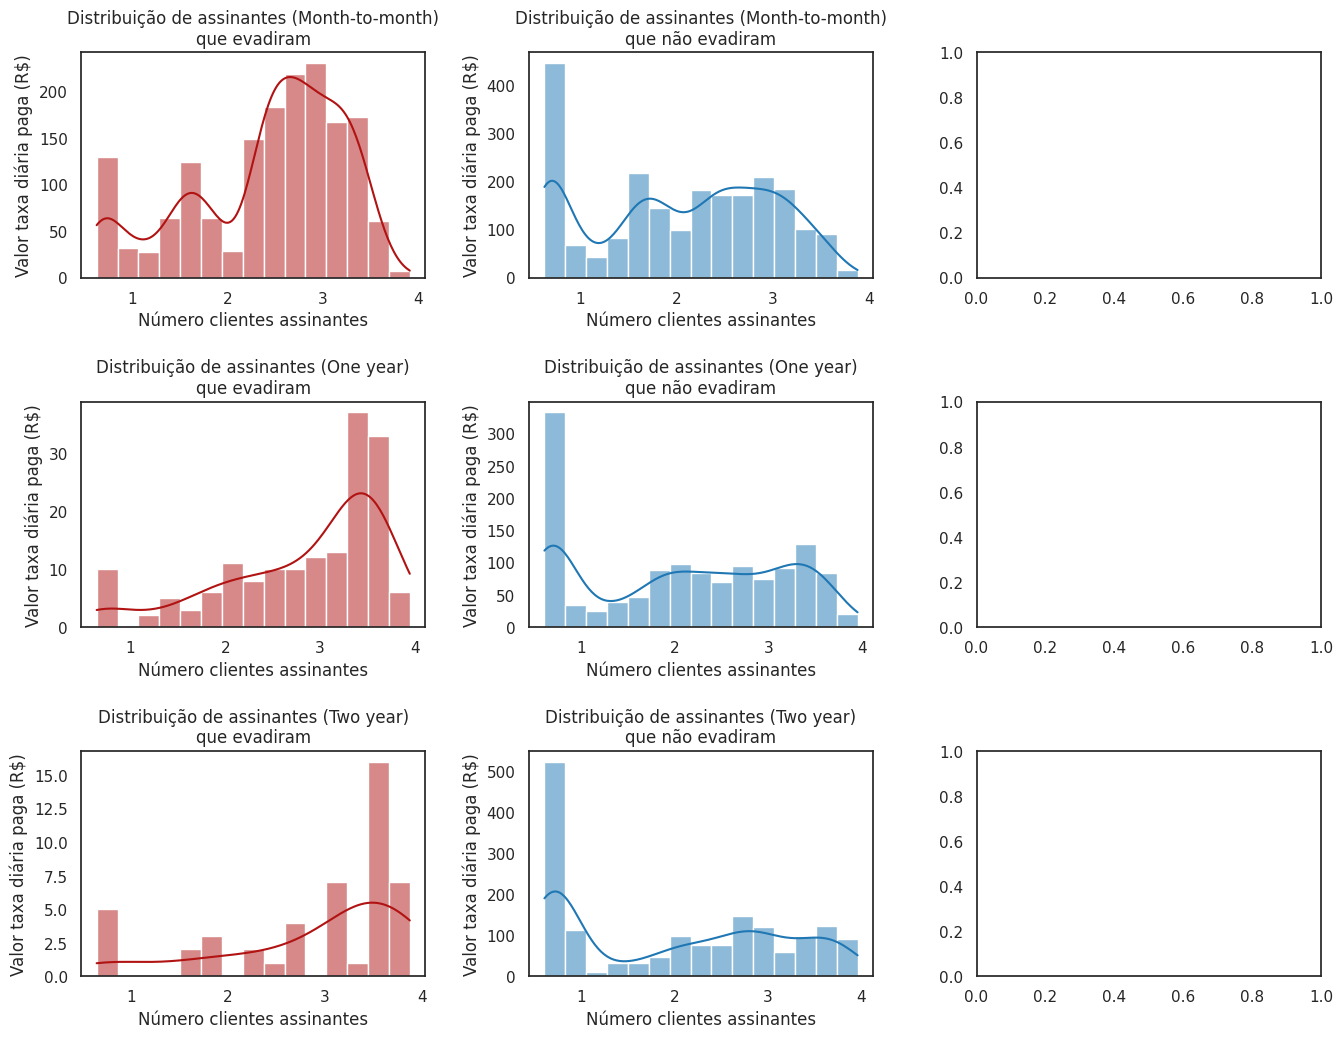

In [210]:
import matplotlib.pyplot as plt

def queryContasDiarias(stringConsulta):
    return df_info_binarias.query(stringConsulta)['contas_diarias']

# Definindo os contratos e churns
contratos = ["Month-to-month", "One year", "Two year"]
churns = [1, 0]

# Dictionary para armazenar os dados
taxas_pagas = {}
for contrato in contratos:
    for churn in churns:
        key = f'taxas_pagas_{["n_evasores", "evasores"][churn]}_{contrato.replace(" ", "_")}'
        taxas_pagas[key] = queryContasDiarias(f'contract == "{contrato}" & churn=={churn}')

# Criando os subplots
fig, axs = plt.subplots(3, 3, figsize=(16, 12), sharey=False)
fig.subplots_adjust(hspace=0.55, wspace=0.3)
NUM_CLASSES = 15

# Cores para os gráficos
colors = {'evasores': '#B11212', 'n_evasores': 'tab:blue'}

# Função para montar rótulos dos subplots
def assembleSubplotLabel2(ax, title, xlabel, ylabel, fontsize):
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)

# Montando os histogramas
for i, contrato in enumerate(contratos):
    for j, churn in enumerate(churns):
        ax_index = i * 3 + j
        key_evasores = f'taxas_pagas_evasores_{contrato.replace(" ", "_")}'
        key_n_evasores = f'taxas_pagas_n_evasores_{contrato.replace(" ", "_")}'

        if j == 0:  # Evasores
            data = taxas_pagas[key_evasores]
            color = colors['evasores']
            title = f'Distribuição de assinantes ({contrato})\nque evadiram'
        else:  # Não Evasores
            data = taxas_pagas[key_n_evasores]
            color = colors['n_evasores']
            title = f'Distribuição de assinantes ({contrato})\nque não evadiram'

        assembleHistogram(
            kde=True,
            data=data,
            stat='count',
            color=color,
            ax=axs.flatten()[ax_index],
            bins=NUM_CLASSES,
            element='bars'
        )

        # Montando legendas
        assembleSubplotLabel2(
            axs.flatten()[ax_index],
            title,
            'Número clientes assinantes',
            'Valor taxa diária paga (R$)',
            12
        )

# Salvar a figura (descomentar se desejar salvar)
# plt.savefig("images/dist_evasoes_tipo_contrato.jpg", dpi=300, bbox_inches='tight')

plt.show()  # Exibir os gráficos


In [211]:
# Contabilizar evasões por método de pagamento:

In [212]:
df_info_binarias['paymentmethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [213]:
def queryByPaymentOption(statusChurn, metodoPagamento):
    infoBusca = f'churn=={statusChurn} & paymentmethod=="{metodoPagamento}"'
    return df_info_binarias.query(infoBusca)['contas_diarias']

In [214]:
taxas_pagas_checkEmail_evasores = queryByPaymentOption(1,'Mailed check')

In [215]:
taxas_pagas_checkEmail_n_evasores = queryByPaymentOption(0,'Mailed check')

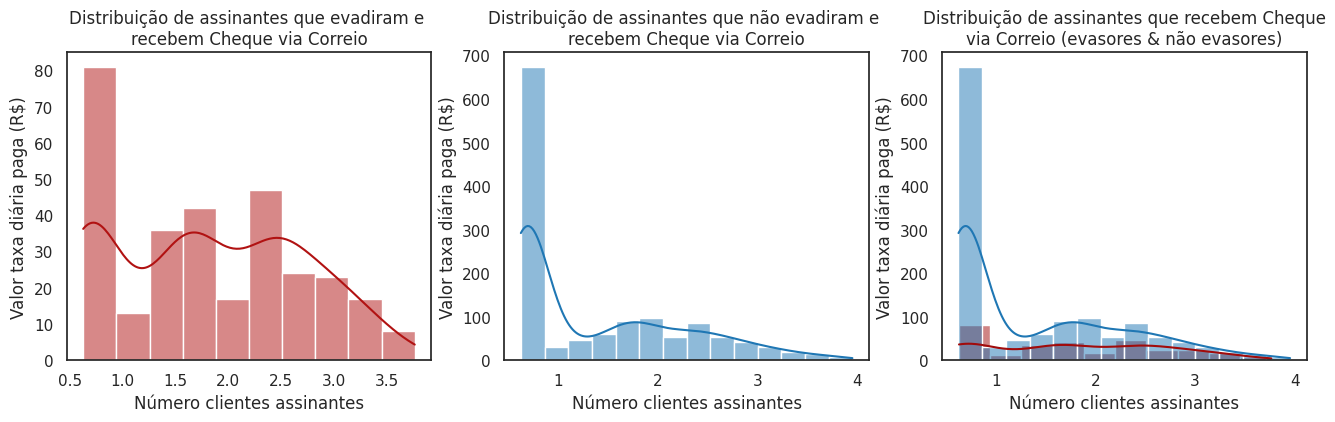

In [216]:
fig,axs = plt.subplots(1,3,figsize=(16,4))
ax1,ax2,ax3 = axs
sns.histplot(
    kde=True,
    data=taxas_pagas_checkEmail_evasores,
    color='#B11212',
    ax=ax1)

sns.histplot(
    kde=True,
    data=taxas_pagas_checkEmail_n_evasores,
    color='tab:blue',
    ax=ax2)

sns.histplot(
    kde=True,
    data=taxas_pagas_checkEmail_evasores,
    color="#A10B0B",
    ax=ax3)

sns.histplot(
    kde=True,
    data=taxas_pagas_checkEmail_n_evasores,
    color='tab:blue',
    ax=ax3)

assembleSubplotLabel2(ax1,
    'Distribuição de assinantes que evadiram e \nrecebem Cheque via Correio',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

assembleSubplotLabel2(ax2,
    'Distribuição de assinantes que não evadiram e \nrecebem Cheque via Correio',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

assembleSubplotLabel2(ax3,
    'Distribuição de assinantes que recebem Cheque\nvia Correio (evasores & não evasores)',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

In [217]:
taxas_pagas_eletroCheck_evasores = queryByPaymentOption(1,'Electronic check')
taxas_pagas_eletroCheck_n_evasores = queryByPaymentOption(0,'Electronic check')

<Axes: xlabel='contas_diarias', ylabel='Count'>

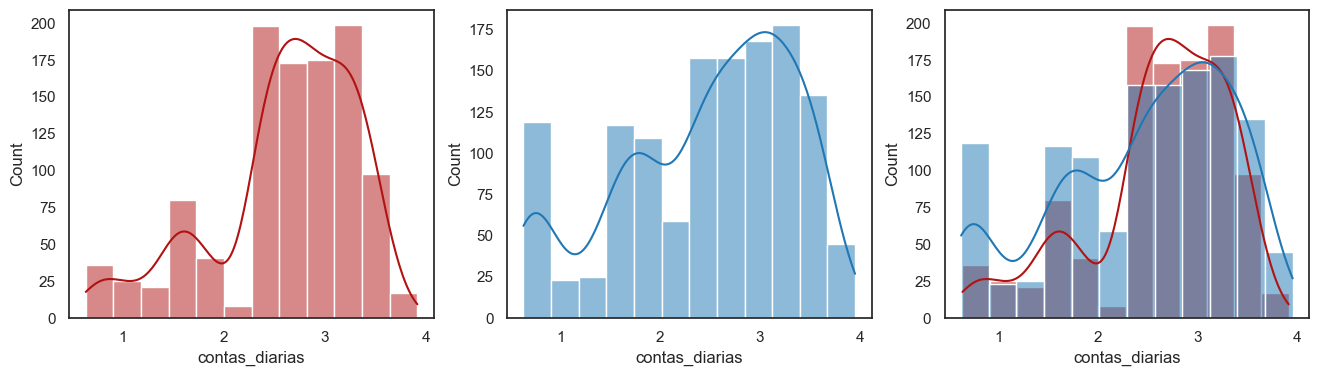

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(16,4))
ax1,ax2,ax3 = axs
sns.histplot(
    kde=True,
    data=taxas_pagas_eletroCheck_evasores,
    color='#B11212', ax=ax1, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_eletroCheck_n_evasores, ax=ax2, bins=12)

sns.histplot(
    kde=True,
    data=taxas_pagas_eletroCheck_evasores,
    color='#B11212', ax=ax3, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_eletroCheck_n_evasores, ax=ax3, bins=12)

In [218]:
x = len(df_info_binarias.query('churn==1 & paymentmethod=="Electronic check"'))
y = len(df_info_binarias.query('churn==0 & paymentmethod=="Electronic check"'))

In [219]:
z = len(df_info_binarias.query('paymentmethod=="Electronic check"'))

In [220]:
z == (x+y)

True

In [221]:
x/z

0.4528541226215645

In [222]:
y/z

0.5471458773784356

In [223]:
taxas_pagas_creditC_evasores = queryByPaymentOption(1,'Credit card (automatic)')
taxas_pagas_creditC_n_evasores = queryByPaymentOption(0,'Credit card (automatic)')

<Axes: xlabel='contas_diarias', ylabel='Count'>

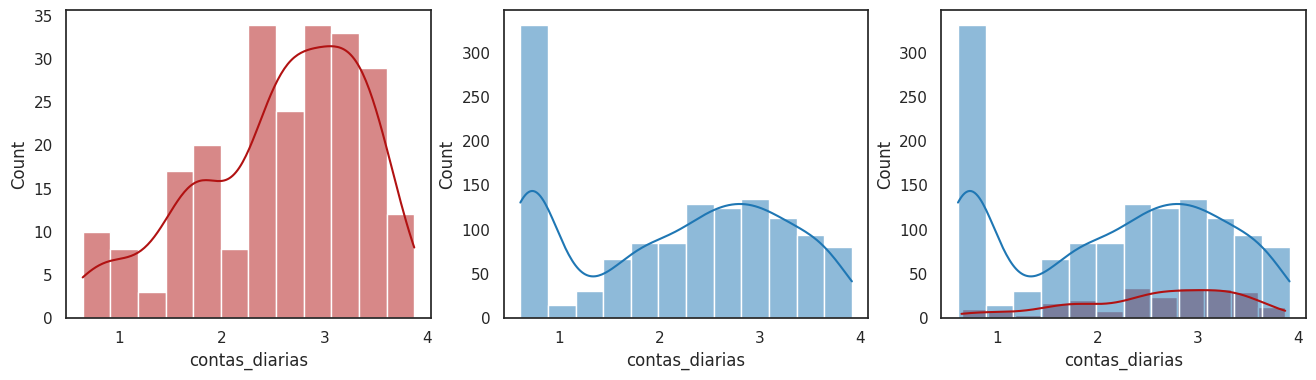

In [224]:
fig,axs = plt.subplots(1,3,figsize=(16,4))
ax1,ax2,ax3 = axs
sns.histplot(
    kde=True,
    data=taxas_pagas_creditC_evasores,
    color='#B11212', ax=ax1, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_creditC_n_evasores, ax=ax2, bins=12)

sns.histplot(
    kde=True,
    data=taxas_pagas_creditC_evasores,
    color='#B11212', ax=ax3, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_creditC_n_evasores, ax=ax3, bins=12)

In [225]:
taxas_pagas_bankT_evasores = queryByPaymentOption(1,'Bank transfer (automatic)')
taxas_pagas_bankT_n_evasores = queryByPaymentOption(0,'Bank transfer (automatic)')

<Axes: xlabel='contas_diarias', ylabel='Count'>

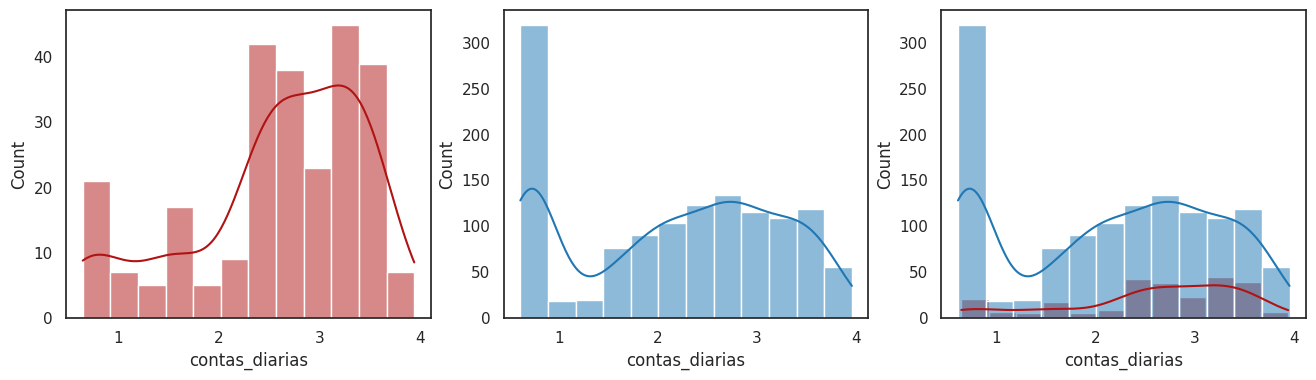

In [226]:
fig,axs = plt.subplots(1,3,figsize=(16,4))
ax1,ax2,ax3 = axs
sns.histplot(
    kde=True,
    data=taxas_pagas_bankT_evasores,
    color='#B11212', ax=ax1, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_bankT_n_evasores, ax=ax2, bins=12)

sns.histplot(
    kde=True,
    data=taxas_pagas_bankT_evasores,
    color='#B11212', ax=ax3, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_bankT_n_evasores, ax=ax3, bins=12)

##### 💡**Ideia: Vou agrupar Evasões (Churns) por método de pagamento:**

Havia implementado essas evasões de maneira separada, irei fazer em um único
plot para facilitar comparação do leitor.

In [227]:
# =========================================================================
# Automatizando a criação de 3 subplots por linha do gráfico abaixo gerado:
# =========================================================================

def plotConjuntoSubplots(
        taxas_pagas_checkEmail_evasores,
        taxas_pagas_checkEmail_n_evasores,
        ax1, ax2, ax3):

    sns.histplot(
    kde=True,
    data=taxas_pagas_checkEmail_evasores,
    color='#B11212',
    ax=ax1, bins=12)
    sns.histplot(
        kde=True,
        data=taxas_pagas_checkEmail_n_evasores,
        color='tab:blue',
        ax=ax2, bins=12)
    sns.histplot(
        kde=True,
        data=taxas_pagas_checkEmail_evasores,
        color="#A10B0B",
        ax=ax3, bins=12)
    sns.histplot(
        kde=True,
        data=taxas_pagas_checkEmail_n_evasores,
        color='tab:blue',
        ax=ax3, bins=12)

def plotConjuntoLabels(
        legendCol1, legendCol2, legendCol3,
        ax1, ax2, ax3):

    labelEixoY = 'Número clientes assinantes'
    labelEixoX = 'Valor taxa diária paga (R$)'

    assembleSubplotLabel2(ax1,
        legendCol1,
        labelEixoY,
        labelEixoX, 12)
    assembleSubplotLabel2(ax2,
        legendCol2,
        labelEixoY,
        labelEixoX, 12)
    assembleSubplotLabel2(ax3,
        legendCol3,
        labelEixoY,
        labelEixoX, 12)


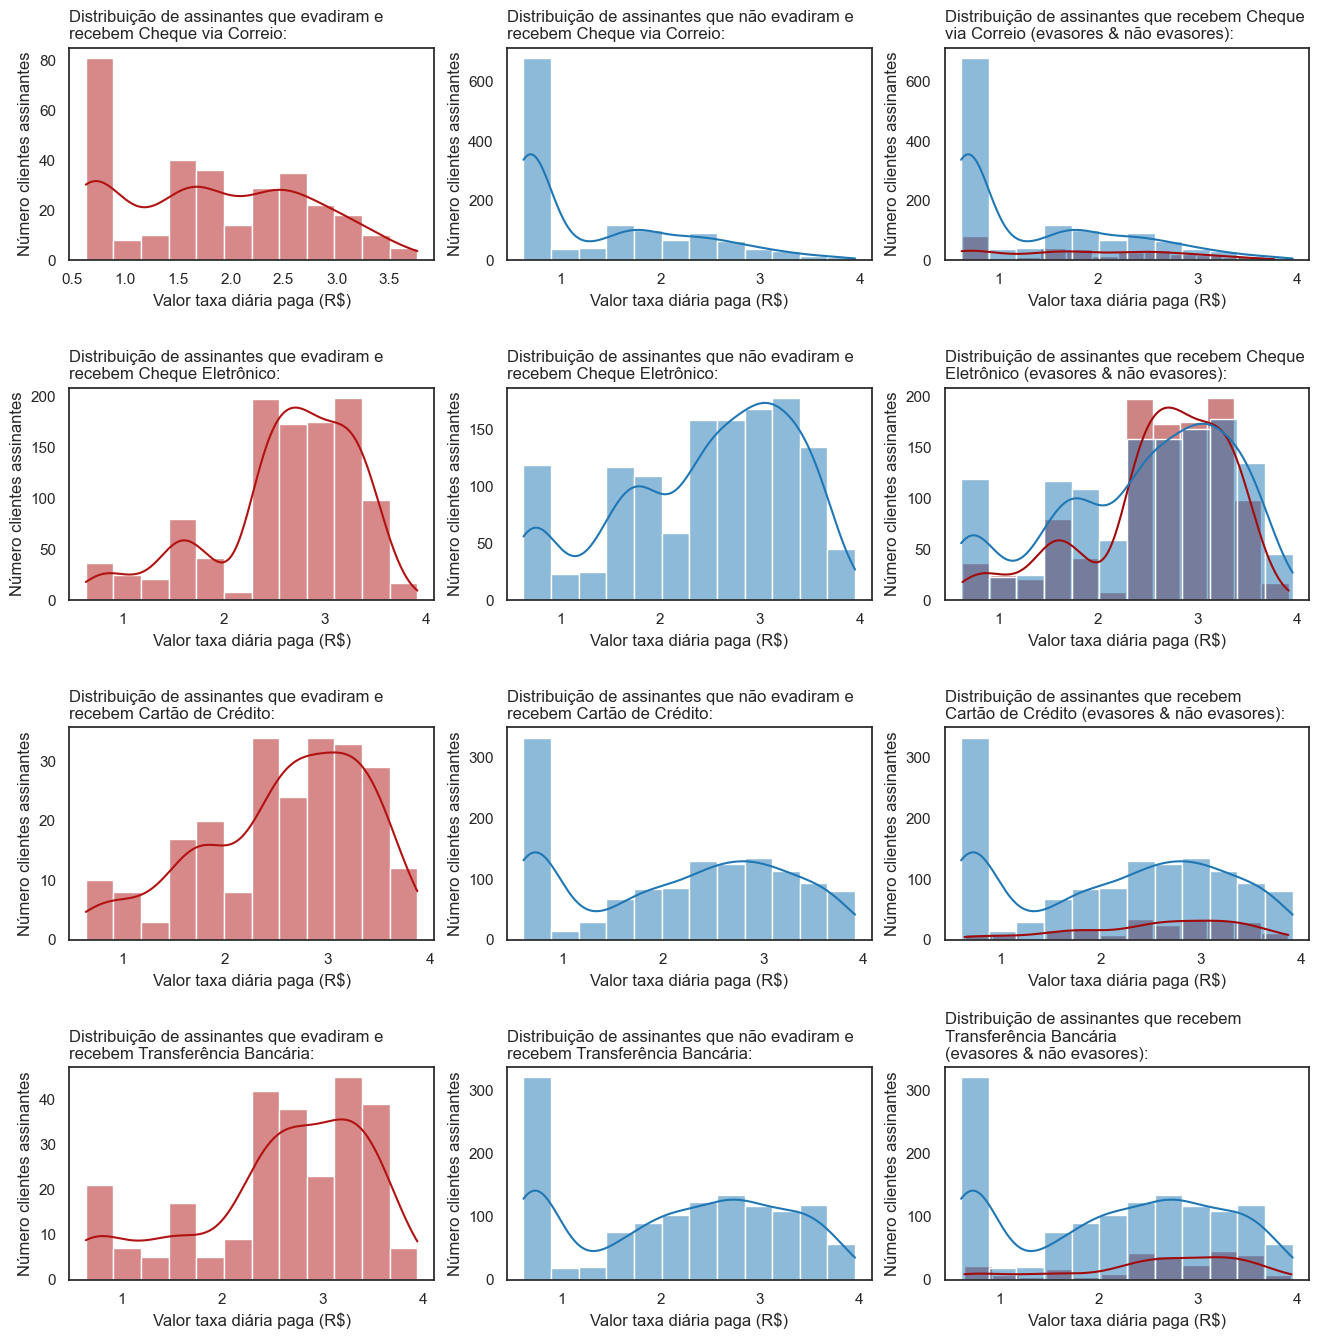

In [ ]:
fig,axs = plt.subplots(4,3,figsize=(16,16), sharey=False)
fig.subplots_adjust(hspace=0.6,wspace=0.2)
ax1,ax2,ax3 = axs[0]
ax4,ax5,ax6 = axs[1]
ax7,ax8,ax9 = axs[2]
ax10,ax11,ax12 = axs[3]

plotConjuntoSubplots(
    taxas_pagas_checkEmail_evasores,
    taxas_pagas_checkEmail_n_evasores,
    ax1,ax2,ax3)

plotConjuntoSubplots(
    taxas_pagas_eletroCheck_evasores,
    taxas_pagas_eletroCheck_n_evasores,
    ax4,ax5,ax6)

plotConjuntoSubplots(
    taxas_pagas_creditC_evasores,
    taxas_pagas_creditC_n_evasores,
    ax7,ax8,ax9)

plotConjuntoSubplots(
    taxas_pagas_bankT_evasores,
    taxas_pagas_bankT_n_evasores,
    ax10,ax11,ax12)

plotConjuntoLabels(
    'Distribuição de assinantes que evadiram e \nrecebem Cheque via Correio',
    'Distribuição de assinantes que não evadiram e \nrecebem Cheque via Correio',
    'Distribuição de assinantes que recebem Cheque\nvia Correio (evasores & não evasores)',
    ax1, ax2, ax3
)

plotConjuntoLabels(
    'Distribuição de assinantes que evadiram e \nrecebem Cheque Eletrônico',
    'Distribuição de assinantes que não evadiram e \nrecebem Cheque Eletrônico',
    'Distribuição de assinantes que recebem Cheque\nEletrônico (evasores & não evasores)',
    ax4, ax5, ax6
)

plotConjuntoLabels(
    'Distribuição de assinantes que evadiram e \nrecebem Cartão de Crédito',
    'Distribuição de assinantes que não evadiram e \nrecebem Cartão de Crédito',
    'Distribuição de assinantes que recebem \nCartão de Crédito (evasores & não evasores)',
    ax7, ax8, ax9
)

plotConjuntoLabels(
    'Distribuição de assinantes que evadiram e \nrecebem Transferência Bancária',
    'Distribuição de assinantes que não evadiram e \nrecebem Transferência Bancária',
    'Distribuição de assinantes que recebem \nTransferência Bancária\n(evasores & não evasores)',
    ax10, ax11, ax12
)

# plt.savefig("images/dist_evasoes_tipo_pagamento_shareY.jpg", dpi=300, bbox_inches='tight')

In [228]:
total_gasto_evasores = df_info_binarias.query('churn==1')['charges_total']
total_gasto_n_evasores = df_info_binarias.query('churn==0')['charges_total']
tempo_de_contrato_evasores = df_info_binarias.query('churn==1')['tenure']
tempo_de_contrato_n_evasores = df_info_binarias.query('churn==0')['tenure']

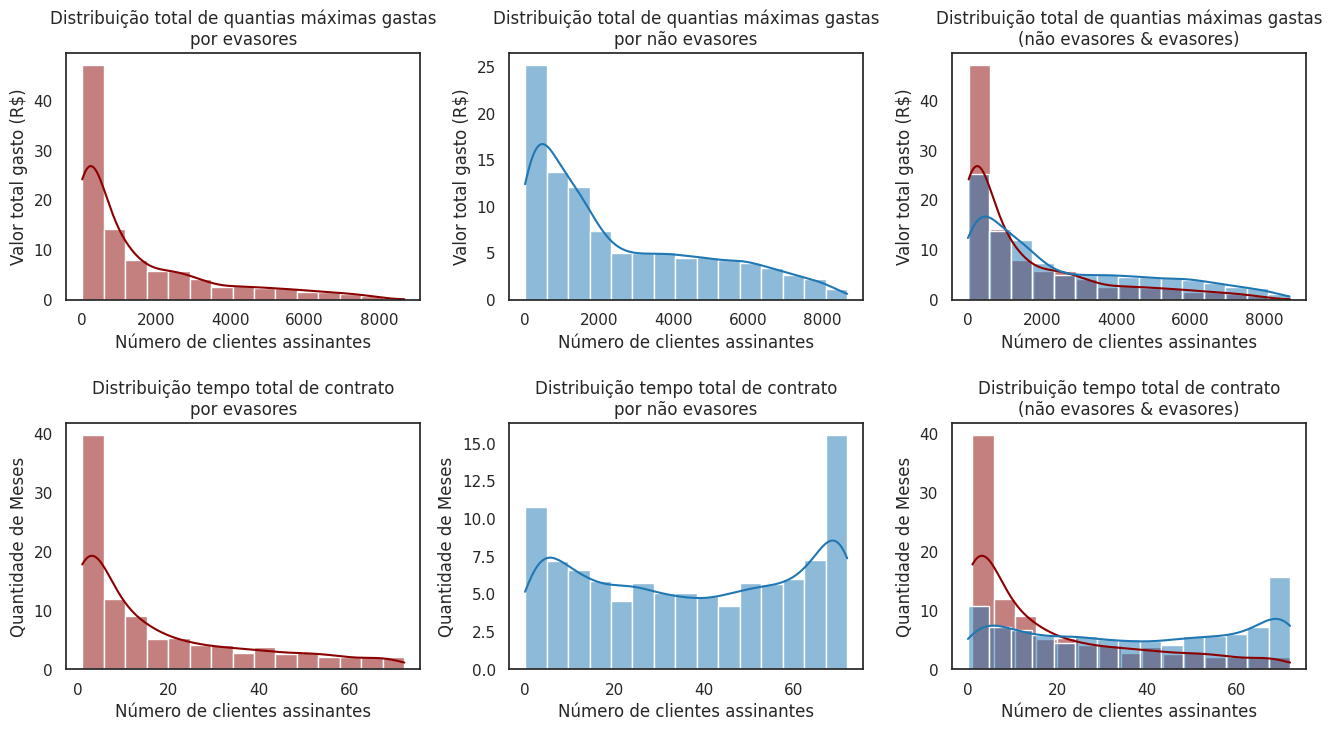

In [229]:
fig, axs = plt.subplots(2,3,figsize=(16,8), sharey=False)
fig.subplots_adjust(hspace=0.5,wspace=0.25)
ax1, ax2, ax3 = axs[0]
ax4, ax5, ax6 = axs[1]
NUM_CLASSES = 15

assembleHistogram(
    total_gasto_evasores, kde=True, ax=ax1,
    element='bars', stat='percent', color="darkred", bins=NUM_CLASSES)

assembleHistogram(
    total_gasto_n_evasores, kde=True, ax=ax2,
    element='bars', stat='percent', color="tab:blue", bins=NUM_CLASSES)

assembleHistogram(
    total_gasto_evasores, kde=True, ax=ax3,
    element='bars', stat='percent', color="darkred", bins=NUM_CLASSES)

assembleHistogram(
    total_gasto_n_evasores, kde=True, ax=ax3,
    element='bars', stat='percent', color="tab:blue", bins=NUM_CLASSES)


assembleHistogram(
    tempo_de_contrato_evasores, kde=True, ax=ax4,
    element='bars', stat='percent', color="darkred", bins=NUM_CLASSES)

assembleHistogram(
    tempo_de_contrato_n_evasores, kde=True, ax=ax5,
    element='bars', stat='percent', color="tab:blue", bins=NUM_CLASSES)

assembleHistogram(
    tempo_de_contrato_evasores, kde=True, ax=ax6,
    element='bars', stat='percent', color="darkred", bins=NUM_CLASSES)

assembleHistogram(
    tempo_de_contrato_n_evasores, kde=True, ax=ax6,
    element='bars', stat='percent', color="tab:blue", bins=NUM_CLASSES)


assembleSubplotLabel2(ax1,
    'Distribuição total de quantias máximas gastas\npor evasores',
    'Número de clientes assinantes',
    'Valor total gasto (R$)',
    12)

assembleSubplotLabel2(ax2,
    'Distribuição total de quantias máximas gastas\npor não evasores',
    'Número de clientes assinantes',
    'Valor total gasto (R$)',
    12)

assembleSubplotLabel2(ax3,
    'Distribuição total de quantias máximas gastas\n(não evasores & evasores)',
    'Número de clientes assinantes',
    'Valor total gasto (R$)',
    12)


assembleSubplotLabel2(ax4,
    'Distribuição tempo total de contrato\npor evasores',
    'Número de clientes assinantes',
    'Quantidade de Meses',
    12)

assembleSubplotLabel2(ax5,
    'Distribuição tempo total de contrato\npor não evasores',
    'Número de clientes assinantes',
    'Quantidade de Meses',
    12)

assembleSubplotLabel2(ax6,
    'Distribuição tempo total de contrato\n(não evasores & evasores)',
    'Número de clientes assinantes',
    'Quantidade de Meses',
    12)

# plt.savefig("images/dist_clientes_por_QuantiaMaxPagas_e_tempoContrato.jpg", dpi=300, bbox_inches='tight')

In [230]:
df_info_binarias.columns

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total', 'contas_diarias'],
      dtype='object')

In [231]:
n1 = len(df_info_binarias.query('churn==1 & phoneservice==1'))
n2 = len(df_info_binarias.query('churn==1 & multiplelines==1'))
n3 = len(df_info_binarias.query('churn==1 & internetservice==1'))
n4 = len(df_info_binarias.query('churn==1 & onlinesecurity==1'))
n5 = len(df_info_binarias.query('churn==1 & onlinebackup==1'))
n6 = len(df_info_binarias.query('churn==1 & deviceprotection==1'))
n7 = len(df_info_binarias.query('churn==1 & techsupport==1'))
n8 = len(df_info_binarias.query('churn==1 & streamingtv==1'))
n9 = len(df_info_binarias.query('churn==1 & streamingmovies==1'))

In [232]:
qtd_evasoes = [n1,n2,n3,n4,n5,n6,n7,n8,n9]

In [233]:
legendas = [
    'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity',
    'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv',
    'Streamingmovies'
]

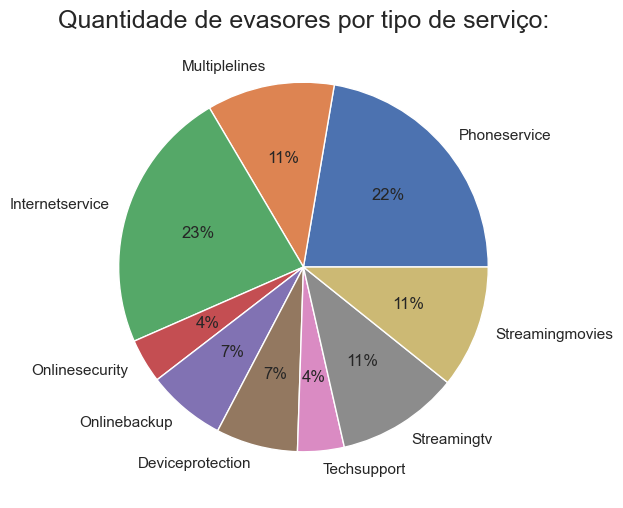

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(qtd_evasoes, labels=legendas, autopct='%1.0f%%')
ax.set_title('Quantidade de evasores por tipo de serviço:', fontsize=18)
plt.show()

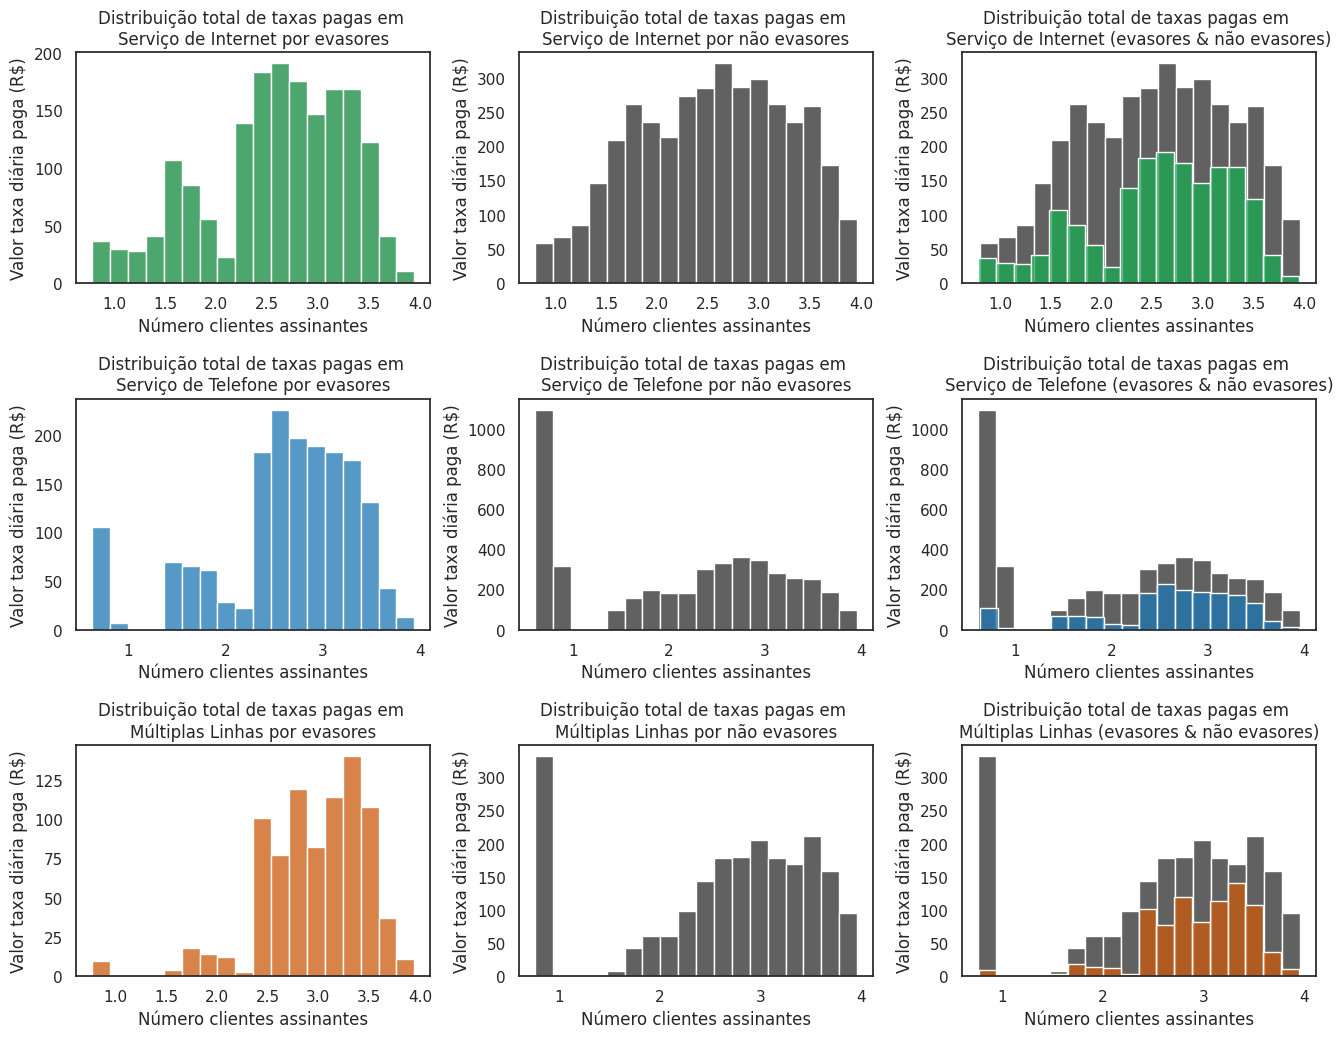

In [234]:
a1 = df_info_binarias.query('churn==1 & internetservice==1')['contas_diarias']
a2 = df_info_binarias.query('churn==0 & internetservice==1')['contas_diarias']

b1 = df_info_binarias.query('churn==1 & phoneservice==1')['contas_diarias']
b2 = df_info_binarias.query('churn==0 & phoneservice==1')['contas_diarias']

c1 = df_info_binarias.query('churn==1 & multiplelines==1')['contas_diarias']
c2 = df_info_binarias.query('churn==0 & multiplelines==1')['contas_diarias']

fig, axs = plt.subplots(3,3, figsize=(16,12))
fig.subplots_adjust(hspace=0.5,wspace=0.25)
ax1, ax2, axy1 = axs[0]
ax3, ax4, axy2 = axs[1]
ax5, ax6, axy3 = axs[2]
NUM_CLASSES = 18

sns.histplot(data=a1, ax=ax1, bins=NUM_CLASSES, color="#12883F")
sns.histplot(data=a2, ax=ax2, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=a2, ax=axy1, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=a1, ax=axy1, bins=NUM_CLASSES, color="#19AC51")

sns.histplot(data=b1, ax=ax3, bins=NUM_CLASSES, color="tab:blue")
sns.histplot(data=b2, ax=ax4, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=b2, ax=axy2, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=b1, ax=axy2, bins=NUM_CLASSES, color="tab:blue")

sns.histplot(data=c1, ax=ax5, bins=NUM_CLASSES, color="#CA590D")
sns.histplot(data=c2, ax=ax6, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=c2, ax=axy3, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=c1, ax=axy3, bins=NUM_CLASSES, color="#CA590D")


plotConjuntoLabels(
    'Distribuição total de taxas pagas em \nServiço de Internet por evasores',
    'Distribuição total de taxas pagas em \nServiço de Internet por não evasores',
    'Distribuição total de taxas pagas em \nServiço de Internet (evasores & não evasores)',
    ax1, ax2, axy1
)

plotConjuntoLabels(
    'Distribuição total de taxas pagas em \nServiço de Telefone por evasores',
    'Distribuição total de taxas pagas em \nServiço de Telefone por não evasores',
    'Distribuição total de taxas pagas em \nServiço de Telefone (evasores & não evasores)',
    ax3, ax4, axy2
)

plotConjuntoLabels(
    'Distribuição total de taxas pagas em \nMúltiplas Linhas por evasores',
    'Distribuição total de taxas pagas em \nMúltiplas Linhas por não evasores',
    'Distribuição total de taxas pagas em \nMúltiplas Linhas (evasores & não evasores)',
    ax5, ax6, axy3
)

# plt.savefig('images/distTaxasPagasServMaisEvadidos.jpg', dpi=300, bbox_inches='tight')

### 📜 **Conclusão**
------

### **Introdução**

- **Problema Identificado:**
  - Alto nível de evasão entre os clientes da **Telecom X**.

- **Objetivo da Análise:**
  - Investigar padrões de evasão dos clientes.
  - Fornecer insights para que a equipe de Data Science para desenvolver modelos que melhorem a retenção de usuários.

### **Limpeza e Tratamento de Dados**

**1. Extração dos Dados**
- O dataset foi baixado do arquivo **TelecomX_Data.json** e armazenado em **data/dadosAPI/**.

**2. Análise do Dataset**
- Avaliação detalhada para identificar a necessidade de normalização e remoção de dados faltantes ou impróprios.

**3. Tratamento de Dados**
- **Normalização**:
  - Utilizou-se **pd.json_normalize()** para organizar os dados por ID de usuário.
- **Remoção de Dados**:
  - Exclusão de dados vazios ou inadequados.
- **Tratamento de Informações String**:
  - Substituição dos valores "Yes" e "No" por **1** e **0**, respectivamente, para facilitar manipulações futuras.

#### **3. Análise Exploratória de Dados:**

- **Observações sobre a Evasão de Clientes:**
  - Notou-se a existência de padrões entre os clientes que abandonaram a empresa.
  - A análise inicial focou na taxa de evasão.
  - Foi identificado que cerca de um quarto dos consumidores, representando aproximadamente 26,6%, deixou de utilizar os serviços.

##### **Figura 1: Planos ativos e cancelados:**

![porcentagem_evasores](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img1.png)

Foi então analisado quais grupos estavam entre os maiores evasores, com base no **tipo de contrato do cliente** foi descoberto o seguinte: a maior parte das evasões vem de contratos baseados em **cobrança mensal**.

##### **Figura 2: Evasões por tipo de contrato:**

![contratos_evasores](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img2.png)

Com base na análise feita anteriormente, senti-me motivado a examinar a distribuição dos valores pagos pelos clientes, conforme o tipo de contrato que possuem. Observa-se claramente no *gráfico abaixo* que os clientes com contrato **Month-to-month** costumam pagar tarifas diárias mais elevadas em comparação com aqueles que têm outros tipos de contratos.

> Como a *figura 3* é bastante extensa, recomenda-se clicar com o botão direito sobre ela e selecionar "Abrir imagem em uma nova aba".

##### **Figura 3: Distribuição de valores pagos por assinantes de determinados tipos de contrato:**

![dist_contratos_evasores](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img3.png)

Observou-se também (baseado na *figura 4*) que a **diferença entre evasores e não evasores**, presentes nos três grupos acima é *elevada*. A *figura 4* mostra como *todos os grupos evasores tendem a pagar maiores valores*, e **como usuários Month-to-month tendem a serem os que mais evadem**:

##### **Figura 4: Distribuição de valores pagos por assinantes de determinados tipos de contrato (Evasores & Não Evasores):**

![porcentagem_evasores2](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img5.png)

Além de discrepâncias com base no tipo de contrato, busquei outras possíveis relações, tal como diferenças entre gênero dos usuários, método de pagamento, entre outras.

Abaixo seguem as análises com maior discrepância no número de evasores e não evasores. A *categoria de pagamentos por Cheque Eletrônico é a que mais apresenta evasões*. A *figura 5* mostra tal situação.

##### **Figura 5: Distribuição de valores pagos por assinantes por Método de Pagamento (Evasores & Não Evasores):**

![porcentagem_evasores3](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img6.png)

Outro fator relevante visto foi a taxa de retenção de clientes por tempo de contrato em meses.

##### **Figura 6: Distribuição na duração em de meses de contrato por assinantes (Evasores & Não Evasores):**

![qtd_evasores4](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img7b.png)

Observa-se, com base na *figura 6* acima, que a maior parte dos evasores são pessoas com poucos meses de contrato.

Após tais observações terem cido feitas, outra dúvita veio em mente. **Quais são os serviços mais usados por evasores?**

Com base na *figura 7* abaixo, conclui-se que os *serviços mais utilizados por clientes evasores* são:

- **1º Lugar:** Serviço de Internet;
- **2º Lugar:** Serviço de Telefone;
- **3º Lugar:** Múltiplas Linhas Telefônicas;

##### **Figura 7: Quantidade (%) de evasores por tipo de serviço:**

![qtd_evasores4](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img8.png)

Complementando o gráfico da *figura 7*, o gráfico da *figura 8* evidencia como clientes, usuários dos **três serviços mais usados por evasores**, tendem a pagar taxas diárias por uso de serviço **mais altas**.

##### **Figura 8: Distribuição de taxas diárias pagas pelos 3 serviços mais usados por Evasores (Comparando também com Não Evasores):**

![dist_evasores5](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img9.png)

#### 📋**Conclusões e Insights:**


principais razões de evasão identificados na análise:

As altas taxas pagas pelos clientes que evadem podem estar diretamente relacionadas ao uso que fazem dos serviços de telefonia e internet.
É provável que haja uma conexão entre os valores elevados que os clientes evasores pagam e a utilização intensiva dos serviços de internet e telefonia.
Parece haver uma ligação entre o alto custo para os clientes que cancelam e o consumo dos serviços de telefonia e internet.

É possível que as altas taxas pagas por evasores, estejam justamente ligadas ao uso de serviços de telefonia e internet dos mesmos.

#### **Recomendações:**

A análise dos padrões sugere que a Telecom X poderia fidelizar seus clientes oferecendo vantagens como bônus por linhas telefônicas adicionais. Outra estratégia seria criar pacotes de internet e telefonia mais atrativos para assinantes de longa data, com descontos ou benefícios que aumentam com o tempo de permanência.

